##  Гипотеза

Образование в мире распределено следующим образом: Америка, Китай, Страны Европы + Канада, Япония, СНГ, Африка. В США патентов больше, чем в Китае.

## Анализ

Выделим топ-10 стран по среднему качеству образования и по кол-ву университетов

In [19]:
import plotly
import matplotlib.pyplot as plt
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

<BarContainer object of 20 artists>

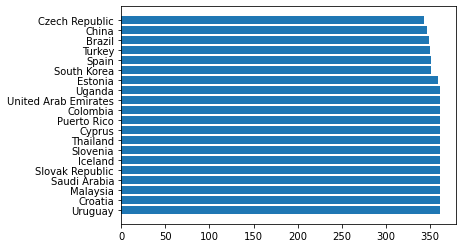

In [2]:
edu = pd.read_csv("cwurData.csv")
edu_df = edu[['world_rank', 'country', 'quality_of_education', 'patents', 'year']]
grouped = edu_df.groupby(['country']).mean().sort_values(by='quality_of_education', ascending=False)
grouped['country'] = grouped.index
edu_plot = grouped.head(20)
plt.barh(edu_plot['country'], edu_plot['quality_of_education'])

<BarContainer object of 20 artists>

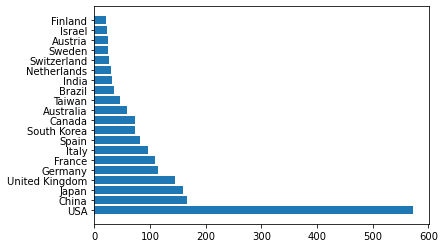

In [3]:
grouped = edu_df.groupby(['country']).count().sort_values(by='quality_of_education', ascending=False)
grouped['country'] = grouped.index
edu_plot = grouped.head(20)
plt.barh(edu_plot['country'], edu_plot['quality_of_education'])

Выделим страны, в которой страны имеют максимальное и минимальное качество образования

In [4]:
edu_df.sort_values(by='quality_of_education', ascending=True).head(1)

,world_rank,country,quality_of_education,patents,year
20,21,USA,1,101,2012


In [5]:
edu_df.sort_values(by='quality_of_education', ascending=False).head(1)

,world_rank,country,quality_of_education,patents,year
2199,1000,China,367,547,2015


Выделим топ-5 стран по кол-ву патентов в университетах

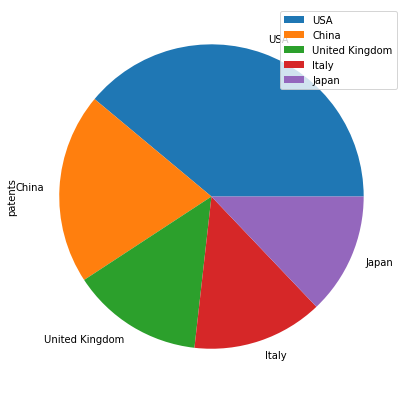

In [20]:
grouped = edu_df[['country', 'patents']]
# grouped = edu_df.groupby(['country']).mean()
grouped = grouped.groupby(['country']).sum().sort_values(by='patents', ascending=False).head(5)
grouped.plot(kind='pie', y='patents')

Выясним изменение по среднего качества образования во времени у США и Китая

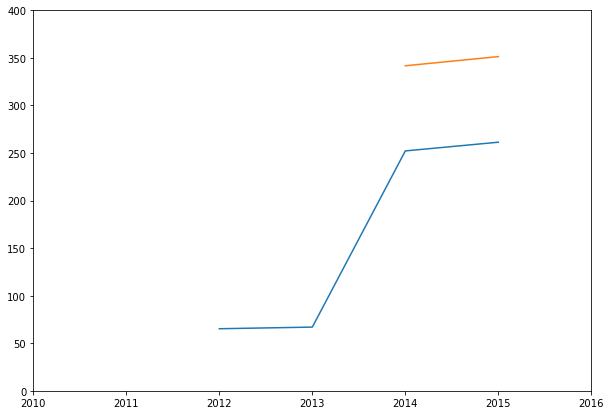

In [54]:
grouped = edu_df[['country', 'quality_of_education', 'year']]
usa = grouped[grouped['country'] == 'USA'][['quality_of_education', 'year']].groupby('year').mean()
china = grouped[grouped['country'] == 'China'][['quality_of_education', 'year']].groupby('year').mean()

usa

fig = plt.figure()

for frame in [usa, china]:
    plt.plot(frame.index, frame['quality_of_education'])

plt.xlim(2010,2016)
plt.ylim(0,400)
plt.show()

## Выводы
Как ни странно, если смотреть по среднему качеству образования в университетах, то выигрывает Уругвай. При том институт с самым низким качеством образования находится в США, что естественно, так как эта страна также первая по кол-ву университетов и из-за этого вероятность нахождения университета с самым низким качеством образования там высока. Если судить по кол-ву патентов, то есть изобретений, то качество образования сходится с основной гипотезой. Качество образования растет со временем.